In [1]:
%reload_ext jupyter_ai
%load_ext jupyter_ai_magics

In [2]:
# %ai chatgpt --format code
# The best regression for a pandas dataframe

In [3]:
#!pip install pandas numpy matplotlib xgboost scikit-learn tqdm

In [4]:
!pip install scikit-learn 

## Optuna

* https://optuna.org/
* https://practicaldatascience.co.uk/machine-learning/how-to-tune-an-xgbregressor-model-with-optuna
* https://practicaldatascience.co.uk/machine-learning/how-to-use-optuna-for-xgboost-hyperparameter-tuning
* https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407
* https://randomrealizations.com/posts/xgboost-parameter-tuning-with-optuna/

In [5]:
! pip install optuna optuna-dashboard --quiet

In [6]:
OPTUNA_DB = "sqlite:///optuna.sqlite3"
get_ipython().system_raw(f"optuna-dashboard {OPTUNA_DB} &")

## MLFlow
* https://www.kaggle.com/code/sharanharsoor/mlflow-end-to-end-ml-models

In [7]:
!pip install mlflow 'mxnet<=1.9.1' --quiet
!pip install pyngrok --quiet
get_ipython().system_raw("mlflow ui --port 5555 &")

[2024-05-27 16:22:51 -0300] [1006238] [INFO] Starting gunicorn 22.0.0
[2024-05-27 16:22:51 -0300] [1006238] [INFO] Listening at: http://127.0.0.1:8080 (1006238)
[2024-05-27 16:22:51 -0300] [1006238] [INFO] Using worker: gthread
[2024-05-27 16:22:51 -0300] [1006314] [INFO] Booting worker with pid: 1006314
[2024-05-27 16:22:59 -0300] [1006721] [INFO] Starting gunicorn 22.0.0
[2024-05-27 16:22:59 -0300] [1006721] [ERROR] Connection in use: ('127.0.0.1', 5555)
[2024-05-27 16:22:59 -0300] [1006721] [ERROR] Retrying in 1 second.
[2024-05-27 16:23:00 -0300] [1006721] [ERROR] Connection in use: ('127.0.0.1', 5555)
[2024-05-27 16:23:00 -0300] [1006721] [ERROR] Retrying in 1 second.
[2024-05-27 16:23:01 -0300] [1006721] [ERROR] Connection in use: ('127.0.0.1', 5555)
[2024-05-27 16:23:01 -0300] [1006721] [ERROR] Retrying in 1 second.
[2024-05-27 16:23:02 -0300] [1006721] [ERROR] Connection in use: ('127.0.0.1', 5555)
[2024-05-27 16:23:02 -0300] [1006721] [ERROR] Retrying in 1 second.
[2024-05-27 

In [8]:
import mlflow

mlflow.autolog()
mlflow.lightgbm.autolog()
mlflow.xgboost.autolog()
# mlflow.gluon.autolog()

2024/05/27 16:23:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/05/27 16:23:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.
"


# Weight and Biases
* https://colab.research.google.com/github/wandb/examples/blob/master/colabs/boosting/Credit_Scorecards_with_XGBoost_and_W%26B.ipynb#scrollTo=agAgfdIeuPdXj


In [9]:
!pip install --upgrade -q wandb

In [10]:
import wandb
WANDB_PROJECT = "intive-interstellar-sales-showdown"

In [11]:
try:
    from kaggle_secrets import UserSecretsClient

    client = UserSecretsClient()
    wandb.login(wandb_api=client.get_secret("wandb_api"))
except ModuleNotFoundError:
    print("Falling back to environmenet variable")
    wandb.login()

Falling back to environmenet variable


wandb: Currently logged in as: gonzalo-matheu-intive. Use `wandb login --relogin` to force relogin


# Autogluon
* https://auto.gluon.ai/stable/tutorials/tabular/tabular-feature-engineering.html
* https://auto.gluon.ai/stable/tutorials/tabular/advanced/index.html

In [65]:
!pip install -U autogluon ipywidgets
# !pip uninstall lightgbm -y
# !pip install lightgbm --install-option=--gpu

In [68]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.features.generators import AutoMLPipelineFeatureGenerator

# Links
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
 * https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

In [69]:
import datetime
import pickle
import warnings
from dataclasses import dataclass
from datetime import date
from getpass import getpass
from pathlib import Path

In [70]:
import lightgbm
import lightgbm as lgbm
import mlflow
import mlflow.lightgbm
import mlflow.xgboost
import numpy as np
import optuna
import optuna.visualization as ov
import pandas as pd
import xgboost
import xgboost as xgb
from numpy import mean, std
from optuna.visualization import plot_intermediate_values
from pandas import read_csv
from pyngrok import ngrok
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.model_selection import (
    RepeatedKFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
)
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [71]:
dataset_name = "original"
output_path = "."
# test_path = '/kaggle/input/dataset/test.csv'
# train_path = '/kaggle/input/dataset/train.csv'
test_path = f"{dataset_name}_test.csv"
train_path = f"{dataset_name}_train.csv"
test_csv = pd.read_csv(test_path)
train_csv = pd.read_csv(train_path)
# sample_submission = pd.read_csv('sample_submission.csv')
train_csv


,id,price,sale_date,cabins,decks,bathrooms,producer,created_date,refitted_date,total_area,...,weight_distribution_x,weight_distribution_y,engine_thrust,radar,bow_thruster,autopilot,solar_panels,navi_quality,state,overall_quality
0,1,1845000.0,2122-11-28,3,1.0,1,59,2106/08,NaN,364.6,...,-0.070052,0.016326,1899.6,0,1,0,0,0,4,8
1,2,861600.0,2122-11-28,3,1.0,3,24,2115/08,NaN,998.3,...,0.104948,0.105376,1550.3,0,1,1,0,0,4,7
2,3,1446000.0,2122-11-28,4,2.0,2,24,2114/12,NaN,1793.4,...,0.110948,0.092526,2692.4,0,0,0,0,0,3,9
3,4,2250000.0,2122-11-28,3,1.0,2,51,2108/01,NaN,327.5,...,-0.082052,-0.005674,1496.6,0,1,1,0,2,4,8
4,5,1200000.0,2122-11-28,4,1.5,2,41,2112/11,NaN,2144.2,...,0.026948,0.149176,2507.2,0,1,1,0,0,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,15125,1005000.0,2123-12-10,3,1.0,2,14,2114/01,NaN,2243.3,...,-0.063052,0.116376,1425.4,0,0,1,0,0,4,7
15125,15126,1080000.0,2123-12-10,4,2.0,2,20,2115/11,NaN,364.5,...,0.036448,0.079526,1150.8,0,1,1,0,0,3,7
15126,15127,2565000.0,2123-12-10,3,1.0,1,43,2110/01,NaN,200.0,...,-0.043552,-0.062674,1919.0,0,0,0,0,0,3,7
15127,15128,1336500.0,2123-12-20,2,1.0,1,50,2105/05,NaN,333.5,...,-0.032052,-0.065674,771.2,0,0,0,0,0,3,6


In [131]:
results = pd.DataFrame(columns=["dataset", "method", "variant", "rmse", "mse", "mae", "timestamp"])
results

,dataset,method,variant,rmse,mse,mae,timestamp


In [132]:
train_csv

,id,price,sale_date,cabins,decks,bathrooms,producer,created_date,refitted_date,total_area,...,weight_distribution_x,weight_distribution_y,engine_thrust,radar,bow_thruster,autopilot,solar_panels,navi_quality,state,overall_quality
0,1,1845000.0,2122-11-28,3,1.0,1,59,2106/08,NaN,364.6,...,-0.070052,0.016326,1899.6,0,1,0,0,0,4,8
1,2,861600.0,2122-11-28,3,1.0,3,24,2115/08,NaN,998.3,...,0.104948,0.105376,1550.3,0,1,1,0,0,4,7
2,3,1446000.0,2122-11-28,4,2.0,2,24,2114/12,NaN,1793.4,...,0.110948,0.092526,2692.4,0,0,0,0,0,3,9
3,4,2250000.0,2122-11-28,3,1.0,2,51,2108/01,NaN,327.5,...,-0.082052,-0.005674,1496.6,0,1,1,0,2,4,8
4,5,1200000.0,2122-11-28,4,1.5,2,41,2112/11,NaN,2144.2,...,0.026948,0.149176,2507.2,0,1,1,0,0,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,15125,1005000.0,2123-12-10,3,1.0,2,14,2114/01,NaN,2243.3,...,-0.063052,0.116376,1425.4,0,0,1,0,0,4,7
15125,15126,1080000.0,2123-12-10,4,2.0,2,20,2115/11,NaN,364.5,...,0.036448,0.079526,1150.8,0,1,1,0,0,3,7
15126,15127,2565000.0,2123-12-10,3,1.0,1,43,2110/01,NaN,200.0,...,-0.043552,-0.062674,1919.0,0,0,0,0,0,3,7
15127,15128,1336500.0,2123-12-20,2,1.0,1,50,2105/05,NaN,333.5,...,-0.032052,-0.065674,771.2,0,0,0,0,0,3,6


In [133]:
train_csv.columns

Index(['id', 'price', 'sale_date', 'cabins', 'decks', 'bathrooms', 'producer',
       'created_date', 'refitted_date', 'total_area', 'crew_area',
       'cabins_area', 'maintenance_area', 'crew_area_coef', 'total_area_coef',
       'weight_distribution_x', 'weight_distribution_y', 'engine_thrust',
       'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality',
       'state', 'overall_quality'],
      dtype='object')

In [134]:
test_csv

,id,sale_date,cabins,decks,bathrooms,producer,created_date,refitted_date,total_area,crew_area,...,weight_distribution_x,weight_distribution_y,engine_thrust,radar,bow_thruster,autopilot,solar_panels,navi_quality,state,overall_quality
0,15130,2122-11-28,4,2.0,3,41,2116/06,NaN,361.6,155.5,...,0.026448,0.116076,1324.3,0,1,1,0,0,3,8
1,15131,2122-11-28,3,1.0,2,3,2114/07,NaN,541.7,104.5,...,-0.029552,0.103176,2408.2,0,0,0,0,0,4,8
2,15132,2122-11-28,4,2.0,2,37,2117/11,NaN,167.2,143.0,...,0.042948,-0.106724,1111.5,0,1,1,0,0,3,8
3,15133,2122-11-28,3,1.0,2,52,2107/03,NaN,237.5,130.0,...,-0.078052,-0.061624,1291.7,0,0,0,0,0,4,9
4,15134,2122-11-28,4,2.0,2,29,2117/03,NaN,2149.9,165.5,...,0.056448,-0.081574,2965.0,0,0,1,0,0,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,21609,2123-12-09,4,2.0,3,36,2117/09,NaN,902.1,124.5,...,-0.098552,0.071976,1528.8,0,1,1,0,0,3,8
6480,21610,2123-12-10,4,1.0,1,51,2109/02,NaN,292.5,99.0,...,-0.073552,-0.000324,1597.0,0,1,0,0,1,4,8
6481,21611,2123-12-10,5,2.0,3,43,2117/11,NaN,267.7,166.0,...,-0.043552,-0.047074,2173.0,0,1,1,0,0,3,9
6482,21612,2123-12-10,4,2.0,2,24,2117/09,NaN,589.0,129.0,...,0.101948,0.097126,2963.6,0,0,0,0,0,3,9


In [76]:
all_features = list(test_csv.columns)
test_csv.columns

Index(['id', 'sale_date', 'cabins', 'decks', 'bathrooms', 'producer',
       'created_date', 'refitted_date', 'total_area', 'crew_area',
       'cabins_area', 'maintenance_area', 'crew_area_coef', 'total_area_coef',
       'weight_distribution_x', 'weight_distribution_y', 'engine_thrust',
       'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality',
       'state', 'overall_quality'],
      dtype='object')

In [168]:
patch_sklearn()

warnings.filterwarnings(
    action="ignore",
    message=".*Could not infer format.*",
)

warnings.filterwarnings(
    action="ignore",
    message=".*autologging encountered a warning.*",
)

warnings.filterwarnings(
    action="ignore",
    message=".*No visible GPU is found.*",
)
warnings.filterwarnings(
    action="ignore",
    message=".*deprecated binary model.*",
)


def load_numeric(file, datetime_to_numeric=True):
    csv = pd.read_csv(file)

    csv["created_date"] = pd.to_datetime(csv["created_date"])
    csv["refitted_date"] = pd.to_datetime(csv["refitted_date"])
    csv["refitted_date"] = csv["refitted_date"].fillna(csv["created_date"])

    csv["sale_date"] = pd.to_datetime(csv["sale_date"])
    age_baseline = max(
        csv["created_date"].max(), csv["refitted_date"].max(), csv["sale_date"].max()
    )

    calculate_age = (
        lambda x: age_baseline.year
        - x.year
        - ((age_baseline.month, age_baseline.day) < (x.month, x.day))
    )
    csv["created_age"] = csv["created_date"].apply(calculate_age)
    csv["refitted_age"] = csv["refitted_date"].apply(calculate_age)
    csv["sale_age"] = csv["sale_date"].apply(calculate_age)

    if datetime_to_numeric:
        csv["created_date"] = pd.to_numeric(csv["created_date"])
        csv["refitted_date"] = pd.to_numeric(csv["refitted_date"])
        csv["sale_date"] = pd.to_numeric(csv["sale_date"])
    print(csv.select_dtypes(include=["object"]).dtypes)
    return csv


def load_train(datetime_to_numeric=True):
    return load_numeric(train_path, datetime_to_numeric=datetime_to_numeric)


def load_test(datetime_to_numeric=True):
    return load_numeric(test_path, datetime_to_numeric=datetime_to_numeric)


def store_submission(alias, test_data, model=None):
    now = datetime.datetime.now().replace(microsecond=0).isoformat().replace(":", "")
    submissions = Path(output_path) / "submissions"
    submissions.mkdir(exist_ok=True)
    filename = f"{submissions}/{now}_{alias}_{dataset_name}_submission"
    if "id" not in test_data.columns:
        test_data["id"] = pd.read_csv("test.csv")["id"]
    test_data[["id", "price"]].to_csv(f"{filename}.csv", index=False)

    if model is not None:
        model_path = f"{filename}.pkl"
        pickle.dump(model, open(model_path, "wb"))


def predict_and_store(alias, model, test_x):
    test_data = load_test()
    test_data["price"] = model.predict(test_x)
    store_submission(alias, test_data, model)
    return test_data


@dataclass
class LocalDataset:
    X: pd.DataFrame
    y: pd.DataFrame
    X_train: pd.DataFrame
    X_test: pd.DataFrame
    y_train: pd.DataFrame
    y_test: pd.DataFrame
    test_data: pd.DataFrame
    train_data: pd.DataFrame
    features: list


@dataclass
class ModelTrain:
    X = None
    y = None
    X_train = None
    X_test = None
    y_train = None
    y_test = None
    features = None
    model = None


def load_split(
    datetime_to_numeric=True,
    test_size=0.2,
    features=None,
    drop=None,
    standard_scaler=True,
):
    train_data = load_train(datetime_to_numeric=datetime_to_numeric)
    test_data = load_test(datetime_to_numeric=datetime_to_numeric)

    df = train_data
    X = df.drop(["price"], axis=1)
    if drop is not None:
        X = df.drop(drop, axis=1)
        test_data = test_data.drop(drop, axis=1)
    if features is None:
        features = list(X.columns)
    else:
        X = X[features]
        test_data = test_data[features]
        print(f"Keeping features {features}")
    y = df["price"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=1
    )

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    test_data = pd.DataFrame(test_data, columns=X.columns)
    train_data = pd.DataFrame(train_data[X.columns], columns=X.columns)
    if standard_scaler:
        scaler = StandardScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
        test_data = pd.DataFrame(scaler.transform(test_data), columns=X.columns)
        train_data = pd.DataFrame(
            scaler.transform(train_data[X.columns]), columns=X.columns
        )
    train_data["price"] = y

    return LocalDataset(
        X, y, X_train, X_test, y_train, y_test, test_data, train_data, features
    )


def calculate_metrics(ld: LocalDataset, model, method, variant="", y_pred=None):
    if y_pred is None:
        y_pred = model.predict(ld.X_test)
    now = datetime.datetime.now().replace(microsecond=0).isoformat().replace(":", "")
    print("MSE: ", mean_squared_error(ld.y_test, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(ld.y_test, y_pred)))
    print("MAE: ", mean_absolute_error(ld.y_test, y_pred))
    metrics = {
        "rmse": np.sqrt(mean_squared_error(ld.y_test, y_pred)),
        "mse": mean_squared_error(ld.y_test, y_pred),
        "mae": mean_absolute_error(ld.y_test, y_pred),
    }
    results.loc[len(results) + 1] = {
        "dataset": dataset_name,
        "method": method,
        "variant": variant,
        "rmse": np.sqrt(mean_squared_error(ld.y_test, y_pred)),
        "mse": mean_squared_error(ld.y_test, y_pred),
        "mae": mean_absolute_error(ld.y_test, y_pred),
        "timestamp": now
    }
    mlflow.log_metrics(metrics)
    results.to_csv(f"results.csv", index=False)
    return results.sort_values(by="rmse")


_ = load_split()

Series([], dtype: object)
Series([], dtype: object)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Sample code

In [136]:
def execute_sample_code(features=["cabins", "decks", "bathrooms", "radar"], variant=""):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    with mlflow.start_run(
        run_name=f"linear-{variant}",
        tags={"version": "v1", "library": "sklearn", "optimization": "n/a"},
        description="sklearn",
    ):
        # load training and test data
        ld = load_split(features=features)
        train_data = ld.X_train
        # choose 4 features and price as training target
        # features = ['cabins', 'decks', 'bathrooms', 'radar']
        # train_x = train_data[features]
        # train_y = ld.y_train

        # simple linear regression model
        # price = a * cabins + b * decs + c * bathrooms + d * radar + e
        model = LinearRegression().fit(ld.X_train, ld.y_train)

        # predict price on test data
        # test_x = ld.test_data[features]
        # test_data = predict_and_store('linear_regression', model, test_x)

        # y_pred = model.predict(ld.X_test)
        # print('MSE: ', mean_squared_error(ld.y_test, y_pred))
        # print('RMSE: ', np.sqrt(mean_squared_error(ld.y_test, y_pred)))
        # print('MAE: ', np.sqrt(mean_absolute_error(ld.y_test, y_pred)))
        calculate_metrics(ld, model, method="linear", variant=variant)

        # mlflow.sklearn.log_model(sk_model=model, input_example=ld.X_train.sample(10))
        # mlflow.log_params(params)

        return model, ld.X_train


sample_model, sample_x = None, None
sample_model, sample_x = execute_sample_code(variant="demo")

Series([], dtype: object)
Series([], dtype: object)
Keeping features ['cabins', 'decks', 'bathrooms', 'radar']
MSE:  780428937023.6322
RMSE:  883418.8910271459
MAE:  610430.3268213463


# SelectKBest features

* https://lifewithdata.com/2022/03/19/feature-selection-with-selectkbest-in-scikit-learn/

In [137]:
def select_features(k=10):
    from sklearn.feature_selection import SelectKBest, chi2
    from sklearn.preprocessing import MinMaxScaler

    # Assuming X and y are your input features and target labels, respectively
    # Select the top 10 features
    selector = SelectKBest(score_func=chi2, k=k)

    df = load_train()
    X = df[[col for col in df.columns if col != "price"]]
    y = df["price"]

    sc = MinMaxScaler()
    X_sc = sc.fit_transform(X)

    # X_new contains the selected features
    X_new = selector.fit_transform(X_sc, y)
    X_new

    kept_features = pd.DataFrame({"columns": X.columns, "Kept": selector.get_support()})
    #     print(kept_features)

    new_train_csv = X.iloc[:, selector.get_support()]
    print(list(new_train_csv.columns))
    return list(new_train_csv.columns), new_train_csv


kept_features, train_csv_kept_features = select_features()
train_csv_kept_features

Series([], dtype: object)
['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']


,decks,maintenance_area,weight_distribution_y,radar,bow_thruster,autopilot,solar_panels,navi_quality,refitted_age,sale_age
0,1.0,50.0,0.016326,0,1,0,0,0,17,1
1,1.0,38.0,0.105376,0,1,1,0,0,8,1
2,2.0,0.0,0.092526,0,0,0,0,0,9,1
3,1.0,47.5,-0.005674,0,1,1,0,2,15,1
4,1.5,66.5,0.149176,0,1,1,0,0,11,1
...,...,...,...,...,...,...,...,...,...,...
15124,1.0,0.0,0.116376,0,0,1,0,0,9,0
15125,2.0,0.0,0.079526,0,1,1,0,0,8,0
15126,1.0,30.0,-0.062674,0,0,0,0,0,13,0
15127,1.0,33.5,-0.065674,0,0,0,0,0,18,0


In [138]:
_ = execute_sample_code(features=kept_features, variant="kbest10")

Series([], dtype: object)
Series([], dtype: object)
Keeping features ['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']
MSE:  682649835361.2692
RMSE:  826226.2616022739
MAE:  524141.9240594843


In [139]:
_ = execute_sample_code(features=select_features(k=5)[0], variant="kbest5")

Series([], dtype: object)
['radar', 'bow_thruster', 'solar_panels', 'navi_quality', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['radar', 'bow_thruster', 'solar_panels', 'navi_quality', 'sale_age']
MSE:  934686115865.0383
RMSE:  966791.661044425
MAE:  662190.5646641605


In [140]:
_ = execute_sample_code(features=select_features(k=15)[0], variant="kbest15")

Series([], dtype: object)
['id', 'sale_date', 'decks', 'producer', 'cabins_area', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'created_age', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['id', 'sale_date', 'decks', 'producer', 'cabins_area', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'created_age', 'refitted_age', 'sale_age']
MSE:  387118133720.1565
RMSE:  622188.1819193905
MAE:  410232.04687431216


In [141]:
_ = execute_sample_code(features=select_features(k=20)[0], variant="kbest20")

Series([], dtype: object)
['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']
MSE:  331421872951.8151
RMSE:  575692.5159769016
MAE:  381156.50755412295


# SkLearn Pipeline

https://machinelearningmastery.com/feature-extraction-on-tabular-data/

In [142]:

train_data = load_train()
test_data = load_test()

df = train_data
X = df[[col for col in df.columns if col != "price"]]
# features = list(new_train_csv.columns)
# X = df[features]
y = df["price"]

# X = X.astype('float')
# y = LabelEncoder().fit_transform(y.astype('str'))

print(X.shape, y.shape)

Series([], dtype: object)
Series([], dtype: object)
(15129, 27) (15129,)


In [143]:
model = LogisticRegression(solver="liblinear")
# cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [144]:
def show_results():
    return results.sort_values(by="rmse")

In [145]:
show_results()

,dataset,method,variant,rmse,mse,mae,timestamp
5,original,linear,kbest20,575692.515977,3.314219e+11,381156.507554,2024-05-27T170034
4,original,linear,kbest15,622188.181919,3.871181e+11,410232.046874,2024-05-27T170034
2,original,linear,kbest10,826226.261602,6.826498e+11,524141.924059,2024-05-27T170033
1,original,linear,demo,883418.891027,7.804289e+11,610430.326821,2024-05-27T170032
3,original,linear,kbest5,966791.661044,9.346861e+11,662190.564664,2024-05-27T170033


In [146]:

# test_data = predict_and_store('linear_regression_pipeline', model, X)
# mean_absolute_error(train_data['price'], model.predict(X))

In [147]:

# transforms for the feature union
transforms = list()
transforms.append(("mms", MinMaxScaler()))
transforms.append(("ss", StandardScaler()))
transforms.append(("rs", RobustScaler()))
transforms.append(
    ("qt", QuantileTransformer(n_quantiles=100, output_distribution="normal"))
)
transforms.append(
    ("kbd", KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform"))
)
transforms.append(("pca", PCA(n_components=7)))
transforms.append(("svd", TruncatedSVD(n_components=7)))
# create the feature union
fu = FeatureUnion(transforms)

In [148]:
model = LogisticRegression(solver="liblinear")
rfe = RFE(estimator=LogisticRegression(solver="liblinear"), n_features_to_select=8)
steps = list()
steps.append(("fu", fu))
steps.append(("rfe", rfe))
steps.append(("m", model))
pipeline = Pipeline(steps=steps)

# cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Autogloun

In [149]:

ld_autogluon = load_split(datetime_to_numeric=False, standard_scaler=False)

X = ld_autogluon.X
y = ld_autogluon.y

Series([], dtype: object)
Series([], dtype: object)


In [150]:
label = "price"
ld_autogluon.train_data[label].describe()

count    1.512900e+04
mean     1.615167e+06
std      1.077826e+06
min      2.250000e+05
25%      9.630000e+05
50%      1.350000e+06
75%      1.923000e+06
max      2.310000e+07
Name: price, dtype: float64

In [151]:
auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()
auto_ml_pipeline_feature_generator.fit_transform(X=X, y=y)

Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    45353.38 MB
	Train Data (Original)  Memory Usage: 3.12 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  3 | ['sale_date', 'created_date', 'refitted_date']
		('float', [])    : 10 | ['decks', 'total_area', 'crew_area', 'cabins_area', 'maintenance_area', ...]
		('int', [])      : 14 | ['id', '

,id,cabins,decks,bathrooms,producer,total_area,crew_area,cabins_area,maintenance_area,crew_area_coef,...,sale_date.day,sale_date.dayofweek,created_date,created_date.year,created_date.month,created_date.dayofweek,refitted_date,refitted_date.year,refitted_date.month,refitted_date.dayofweek
0,1,3,1.0,1,59,364.6,118.0,68.0,50.0,93.0,...,28,5,4310064000000000000,2106,8,6,4310064000000000000,2106,8,6
1,2,3,1.0,3,24,998.3,92.5,54.5,38.0,70.5,...,28,5,4594060800000000000,2115,8,3,4594060800000000000,2115,8,3
2,3,4,2.0,2,24,1793.4,135.5,135.5,0.0,139.0,...,28,5,4573065600000000000,2114,12,5,4573065600000000000,2114,12,5
3,4,3,1.0,2,51,327.5,119.5,72.0,47.5,100.5,...,28,5,4354819200000000000,2108,1,6,4354819200000000000,2108,1,6
4,5,4,1.5,2,41,2144.2,181.5,115.0,66.5,141.5,...,28,5,4507401600000000000,2112,11,1,4507401600000000000,2112,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,15125,3,1.0,2,14,2243.3,70.5,70.5,0.0,147.5,...,10,4,4544208000000000000,2114,1,0,4544208000000000000,2114,1,0
15125,15126,4,2.0,2,20,364.5,101.0,101.0,0.0,104.5,...,10,4,4602009600000000000,2115,11,4,4602009600000000000,2115,11,4
15126,15127,3,1.0,1,43,200.0,95.0,65.0,30.0,94.0,...,10,4,4417977600000000000,2110,1,2,4417977600000000000,2110,1,2
15127,15128,2,1.0,1,50,333.5,69.5,36.0,33.5,46.0,...,20,0,4270579200000000000,2105,5,4,4270579200000000000,2105,5,4


In [152]:
with mlflow.start_run(
    run_name="linear-automlfeatures",
    tags={
        "version": "v1",
        "library": "sklearn",
        "optimization": "AutoMLPipelineFeatureGenerator",
    },
    description="sklearn with AutoMLPipelineFeatureGenerator",
):
    model = LinearRegression().fit(
        auto_ml_pipeline_feature_generator.transform(X=ld_autogluon.X_train),
        ld_autogluon.y_train,
    )
    calculate_metrics(
        ld_autogluon,
        model,
        method="linear",
        variant="automlfeatures",
        y_pred=model.predict(
            auto_ml_pipeline_feature_generator.transform(X=ld_autogluon.X_test)
        ),
    )

MSE:  316146148989.10785
RMSE:  562268.7515673513
MAE:  375787.0019733329


In [153]:

predictor = None

time_limit = 3600
TIME_LIMIT_BASE=30
presets = "medium_quality"


def execute_autogluon(
    time_limit=3600,
    presets="medium_quality",
    num_bag_folds=5,
    num_bag_sets=1,
    num_stack_levels=1,
    calibrate_decision_threshold=True,
):
    with mlflow.start_run(
        run_name=f"autogluon-{presets}",
        tags={"version": "v1", "library": "autogluon", "optimization": presets},
        description="autogluon",
    ):
        predictor = TabularPredictor(
            label=label, problem_type="regression", path=f"AutogluonModels/{presets}"
        ).fit(
            ld_autogluon.train_data,
            num_gpus=1,
            presets=presets,
            time_limit=time_limit,
            dynamic_stacking=False,
            num_bag_folds=num_bag_folds,
            num_bag_sets=num_bag_sets,
            num_stack_levels=num_stack_levels,
            calibrate_decision_threshold=calibrate_decision_threshold,
            feature_generator=auto_ml_pipeline_feature_generator,
        )
        calculate_metrics(
            ld_autogluon,
            model,
            method="autogluon",
            variant=presets,
            y_pred=predictor.predict(
                auto_ml_pipeline_feature_generator.transform(X=ld_autogluon.X_test)
            ),
        )
        metrics = predictor.evaluate(ld_autogluon.train_data, silent=True)
        mlflow.log_metrics(metrics)
        predictor.leaderboard(ld_autogluon.train_data)
        predict_and_store(f"autogluon_{presets}", predictor, ld_autogluon.test_data)
        return predictor

In [154]:
medium_quality_predictor = execute_autogluon(presets="medium_quality", time_limit=TIME_LIMIT_BASE)
medium_quality_predictor.evaluate(ld_autogluon.train_data, silent=True)

Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/medium_quality"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       44.21 GB / 62.58 GB (70.6%)
Disk Space Avail:   111.27 GB / 848.70 GB (13.1%)
Train Data Rows:    15129
Train Data Columns: 27
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
AutoMLPipelineFeatureGenerator is already fit, so the training data will be processed via .transform() instead of .fit_transform().
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  3 | ['sale_date', 'created_date', 'refitted_date']
		('float', [])    : 10 | ['decks',

MSE:  20198178322.172806
RMSE:  142120.2952507938
MAE:  81627.10738185723
Series([], dtype: object)


{'root_mean_squared_error': -159951.7295309237,
 'mean_squared_error': -25584555779.933773,
 'mean_absolute_error': -80629.3134522275,
 'r2': 0.9779753326438951,
 'pearsonr': 0.9901151777905849,
 'median_absolute_error': -43967.8125}

In [155]:
medium_quality_predictor.feature_importance(ld_autogluon.train_data, time_limit=TIME_LIMIT_BASE)

Computing feature importance via permutation shuffling for 27 features using 5000 rows with 10 shuffle sets... Time limit: 30s...
	121.96s	= Expected runtime (12.2s per shuffle set)
	24.67s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
weight_distribution_y,547805.399755,13189.391984,2.184240e-16,10,561359.982711,534250.816799
crew_area,516104.946057,26702.085558,2.117533e-13,10,543546.365208,488663.526905
overall_quality,475003.824092,26507.805378,4.177900e-13,10,502245.583788,447762.064395
weight_distribution_x,365570.448168,24152.622242,1.900262e-12,10,390391.813866,340749.082469
crew_area_coef,118244.630013,6224.297710,2.472840e-13,10,124641.267535,111847.992491
created_date,115549.818639,5286.724498,7.018648e-14,10,120982.923202,110116.714076
radar,95296.911535,19037.164689,3.530569e-08,10,114861.181695,75732.641375
cabins_area,64412.235166,6207.024466,5.575569e-11,10,70791.121178,58033.349154
producer,53494.956847,4107.811689,7.313346e-12,10,57716.506587,49273.407107
sale_date,47532.563310,5487.062788,2.791233e-10,10,53171.553175,41893.573444


In [156]:
medium_quality_predictor.leaderboard(ld_autogluon.train_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,-9.967987e+04,-2.497247e+05,root_mean_squared_error,5.287098,5.041398,25.434355,1.376752,1.335661,4.394777,2,True,7
1,RandomForestMSE_BAG_L1,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.541149,0.708973,7.577813,0.541149,0.708973,7.577813,1,True,5
2,WeightedEnsemble_L2,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.542332,0.709289,7.590006,0.001183,0.000316,0.012193,2,True,6
3,WeightedEnsemble_L3,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.542588,0.709327,7.590983,0.001439,0.000354,0.013170,3,True,8
4,LightGBMXT_BAG_L1,-1.601414e+05,-3.544358e+05,root_mean_squared_error,1.978570,1.981951,6.852803,1.978570,1.981951,6.852803,1,True,3
5,LightGBM_BAG_L1,-1.745047e+05,-3.571592e+05,root_mean_squared_error,1.273969,0.903499,6.585309,1.273969,0.903499,6.585309,1,True,4
6,KNeighborsDist_BAG_L1,-9.850427e+05,-1.176789e+06,root_mean_squared_error,0.061683,0.055961,0.012041,0.061683,0.055961,0.012041,1,True,2
7,KNeighborsUnif_BAG_L1,-1.022551e+06,-1.139478e+06,root_mean_squared_error,0.054975,0.055353,0.011613,0.054975,0.055353,0.011613,1,True,1


In [157]:
high_quality_predictor = execute_autogluon(presets="high_quality", time_limit=TIME_LIMIT_BASE)
high_quality_predictor.leaderboard(ld_autogluon.train_data)

Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~5x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/high_quality"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       44.55 GB / 62.58 GB (71.2%)
Disk Space Avail:   110.56 GB / 848.70 GB (13.0%)
Train Data Rows:    15129
Train Data Columns: 27
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feat

MSE:  20198178322.172806
RMSE:  142120.2952507938
MAE:  81627.10738185723
Series([], dtype: object)


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2_FULL,-1.028992e+05,NaN,root_mean_squared_error,1.316589,NaN,13.815363,0.129147,NaN,1.569290,2,True,15
1,LightGBM_BAG_L1_FULL,-1.309367e+05,NaN,root_mean_squared_error,0.209071,NaN,1.784404,0.209071,NaN,1.784404,1,True,12
2,LightGBMXT_BAG_L1_FULL,-1.408644e+05,NaN,root_mean_squared_error,0.357849,NaN,2.572707,0.357849,NaN,2.572707,1,True,11
3,RandomForestMSE_BAG_L1_FULL,-1.599517e+05,NaN,root_mean_squared_error,0.518961,0.751323,7.867876,0.518961,0.751323,7.867876,1,True,13
4,WeightedEnsemble_L2_FULL,-1.599517e+05,NaN,root_mean_squared_error,0.520182,NaN,7.882284,0.001222,NaN,0.014408,2,True,14
5,WeightedEnsemble_L3_FULL,-1.599517e+05,NaN,root_mean_squared_error,0.520539,NaN,7.887426,0.001579,NaN,0.019550,3,True,16
6,RandomForestMSE_BAG_L1,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.530440,0.751323,7.867876,0.530440,0.751323,7.867876,1,True,5
7,WeightedEnsemble_L3,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.531541,0.751704,7.887426,0.001101,0.000381,0.019550,3,True,8
8,WeightedEnsemble_L2,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.532005,0.751667,7.882284,0.001566,0.000345,0.014408,2,True,6
9,KNeighborsDist_BAG_L1_FULL,-9.850427e+05,NaN,root_mean_squared_error,0.051345,0.053803,0.010538,0.051345,0.053803,0.010538,1,True,10


In [158]:
best_quality_predictor = execute_autogluon(presets="best_quality", time_limit=TIME_LIMIT_BASE)
best_quality_predictor.leaderboard(ld_autogluon.train_data)

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/best_quality"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       44.46 GB / 62.58 GB (71.1%)
Disk Space Avail:   109.24 GB / 848.70 GB (12.9%)
Train Data Rows:    15129
Train Data Columns: 27
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
AutoMLPipelineFeatureGenerator is already fit, so the training data will be processed via .transform() instead of .fit_transform().
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) : 

MSE:  20198178322.172806
RMSE:  142120.2952507938
MAE:  81627.10738185723
Series([], dtype: object)


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,-1.419654e+05,-2.650232e+05,root_mean_squared_error,4.435022,4.081224,26.059632,0.361618,0.291017,2.492892,2,True,7
1,RandomForestMSE_BAG_L1,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.545168,0.670064,8.328883,0.545168,0.670064,8.328883,1,True,5
2,WeightedEnsemble_L2,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.546249,0.670420,8.340364,0.001081,0.000356,0.011481,2,True,6
3,WeightedEnsemble_L3,-1.599517e+05,-1.610578e+05,root_mean_squared_error,0.546723,0.670751,8.349221,0.001555,0.000687,0.020338,3,True,8
4,LightGBMXT_BAG_L1,-1.601414e+05,-3.544358e+05,root_mean_squared_error,2.281471,2.053913,7.702399,2.281471,2.053913,7.702399,1,True,3
5,LightGBM_BAG_L1,-1.745047e+05,-3.571592e+05,root_mean_squared_error,1.134765,0.963728,7.515659,1.134765,0.963728,7.515659,1,True,4
6,KNeighborsDist_BAG_L1,-9.850427e+05,-1.176789e+06,root_mean_squared_error,0.061611,0.052877,0.009392,0.061611,0.052877,0.009392,1,True,2
7,KNeighborsUnif_BAG_L1,-1.022551e+06,-1.139478e+06,root_mean_squared_error,0.050391,0.049624,0.010408,0.050391,0.049624,0.010408,1,True,1


In [159]:
# test_data = load_test(datetime_to_numeric=False)
# df = auto_ml_pipeline_feature_generator.transform(test_data)
# test_x = df.drop([], axis=1)
# predict_and_store(f"autogluon_{presets}", medium_quality_predictor, test_x)

In [160]:
show_results()

,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,142120.295251,2.019818e+10,81627.107382,2024-05-27T170123
8,original,autogluon,high_quality,142120.295251,2.019818e+10,81627.107382,2024-05-27T170239
9,original,autogluon,best_quality,142120.295251,2.019818e+10,81627.107382,2024-05-27T170318
6,original,linear,automlfeatures,562268.751567,3.161461e+11,375787.001973,2024-05-27T170045
5,original,linear,kbest20,575692.515977,3.314219e+11,381156.507554,2024-05-27T170034
4,original,linear,kbest15,622188.181919,3.871181e+11,410232.046874,2024-05-27T170034
2,original,linear,kbest10,826226.261602,6.826498e+11,524141.924059,2024-05-27T170033
1,original,linear,demo,883418.891027,7.804289e+11,610430.326821,2024-05-27T170032
3,original,linear,kbest5,966791.661044,9.346861e+11,662190.564664,2024-05-27T170033


# Optuna + Autogluon

In [163]:
def execute_autogluon_optuna(
    presets="medium_quality", time_limit=3600, n_trials=10, study_alias=""
):
    with mlflow.start_run(
        run_name="autogluon_optuna",
        tags={"version": "v1", "library": "autogluon", "optimization": "optuna"},
        description="autogluon_optuna",
    ) as parent_run:
        mlflow.log_param("parent", "yes")

        def objective(trial):
            number = trial.number
            with mlflow.start_run(
                run_name=f"autogluon_optuna_trial_{number}",
                description="autogluon_optuna_trial",
                tags={
                    "version": "v1",
                    "library": "autogluon",
                    "optimization": "optuna",
                    "trial": "true",
                },
                nested=True,
            ):
                params = {
                    "num_bag_folds": trial.suggest_int("num_bag_folds", 2, 5),
                    "num_bag_sets": trial.suggest_int("num_bag_sets", 1, 5),
                    "num_stack_levels": trial.suggest_int("num_stack_levels", 1, 5),
                    "calibrate_decision_threshold": trial.suggest_categorical(
                        "calibrate_decision_threshold", [False]
                    ),
                }
                ld = load_split()

                predictor = TabularPredictor(
                    label=label,
                    problem_type="regression",
                    path=f"AutogluonModels/{study_alias}_{presets}_trial_{number}_n{n_trials}_{time_limit}s",
                ).fit(
                    ld_autogluon.train_data,
                    num_gpus=1,
                    presets=presets,
                    time_limit=time_limit,
                    dynamic_stacking=False,
                    feature_generator=auto_ml_pipeline_feature_generator,
                    **params,
                )
                model = predictor
                y_pred = model.predict(ld.X_test)

                calculate_metrics(ld, model, method="autogluon_optuna_trial", variant="trial")

                return mean_squared_error(ld.y_test, y_pred)

        study = optuna.create_study(
            direction="minimize",
            storage="sqlite:///optuna.sqlite3",
            sampler=optuna.samplers.TPESampler(seed=42),
            pruner=optuna.pruners.MedianPruner(),
            study_name=f"autogluon-regression_{study_alias}_n{n_trials}_{time_limit}s_{presets}",
            load_if_exists=True,
        )
        study.optimize(objective, n_trials=n_trials)

        ld = load_split()
        best_trial = study.best_trial
        # model = TabularPredictor(label=label, problem_type="regression", path=f'AutogluonModels/optuna-{presets}').fit(
        #     ld_autogluon.train_data,
        #     num_gpus=1,
        #     presets=presets,
        #     time_limit=time_limit,
        #     dynamic_stacking=False,
        #     feature_generator=auto_ml_pipeline_feature_generator,
        #     **study.best_params,
        # )
        number = best_trial.number
        model = TabularPredictor.load(f"AutogluonModels/{study_alias}_{presets}_trial_{number}_n{n_trials}_{time_limit}s")
        # model.fit(ld.X, ld.y)
        # y_pred = model.predict(ld.X_test)

        calculate_metrics(ld, model, method="autogluon-optuna", variant=f"{presets}_n{n_trials}_{time_limit}s_{study_alias}")
        predict_and_store(f"autogluon-optuna_{presets}_{number}_n{n_trials}_{time_limit}s", model, ld_autogluon.test_data)

        return model, study

In [164]:
N_TRIALS=2
_, study = execute_autogluon_optuna(
    presets="medium_quality", n_trials=N_TRIALS, time_limit=TIME_LIMIT_BASE, study_alias="first"
)

[I 2024-05-27 17:08:12,738] A new study created in RDB with name: autogluon-regression_first_n2_30s_medium_quality
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/first_medium_quality_trial_0_n2_30s"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       43.90 GB / 62.58 GB (70.2%)
Disk Space Avail:   107.78 GB / 848.70 GB (12.7%)
Train Data Rows:    15129
Train Data Columns: 27
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
AutoMLPipelineFeatureGenerator is already fit, so the training data will be processed via .transform() instead of .fit_transform().
	Types of features in original data (

Series([], dtype: object)
Series([], dtype: object)


	-1139477.562	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 7.87s of the 29.83s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-1176788.7016	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 7.77s of the 29.73s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	Fitting 3 child models (S1F1 - S1F3) | Fitting with ParallelLocalFoldFittingStrategy (3 workers, per: cpus=2, gpus=0, memory=0.07%)
	-361969.1369	 = Validation score   (-root_mean_squared_error)
	4.51s	 = Training   runtime
	0.96s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1.53s of the 23.5s of remaining time.
Specified total num_gpus: 1, but only 0 are availab

MSE:  2611442990301.917
RMSE:  1615995.9747171146
MAE:  1259224.724398959
Series([], dtype: object)


Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/first_medium_quality_trial_1_n2_30s"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       43.87 GB / 62.58 GB (70.1%)
Disk Space Avail:   107.72 GB / 848.70 GB (12.7%)
Train Data Rows:    15129
Train Data Columns: 27
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
AutoMLPipelineFeatureGenerator is already fit, so the training data will be processed via .transform() instead of .fit_transform().
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  3 | ['sale_date', 'created_date', 'refitted_date']
		('float', []

Series([], dtype: object)


	-1176788.7016	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 19.8s of the 29.79s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	Fitting 4 child models (S1F1 - S1F4) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=2, gpus=0, memory=0.07%)
	-355020.3328	 = Validation score   (-root_mean_squared_error)
	6.61s	 = Training   runtime
	1.0s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 11.73s of the 21.72s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	Fitting 4 child models (S1F1 - S1F4) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=2, gpus=0, memory=0.07%)
	-361182.8287	 = Validation score   (-root_mean_squared_error)
	4.05s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: RandomF

MSE:  1955257432825.355
RMSE:  1398305.2001710339
MAE:  936146.1256815929
Series([], dtype: object)
Series([], dtype: object)
MSE:  1955257432825.355
RMSE:  1398305.2001710339
MAE:  936146.1256815929
Series([], dtype: object)


In [165]:
_, hq_study = execute_autogluon_optuna(
    presets="high_quality", n_trials=N_TRIALS, time_limit=TIME_LIMIT_BASE, study_alias="first"
)

[I 2024-05-27 17:09:31,265] A new study created in RDB with name: autogluon-regression_first_n2_30s_high_quality
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=4, num_bag_folds=3, num_bag_sets=5
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~3x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/first_high_quality_trial_0_n2_30s"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       43.81 GB / 62.58 GB (70.0%)
Disk Space Avail:   107.02 GB / 848.70 GB (12.6%)
Train

Series([], dtype: object)
Series([], dtype: object)


	-1139477.562	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 7.89s of the 29.85s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-1176788.7016	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 7.79s of the 29.75s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	Fitting 3 child models (S1F1 - S1F3) | Fitting with ParallelLocalFoldFittingStrategy (3 workers, per: cpus=2, gpus=0, memory=0.07%)
	-361969.1369	 = Validation score   (-root_mean_squared_error)
	4.5s	 = Training   runtime
	0.92s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1.66s of the 23.63s of remaining time.
Specified total num_gpus: 1, but only 0 are availab

MSE:  2602144312254.6045
RMSE:  1613116.335623257
MAE:  1250901.1565133426
Series([], dtype: object)
Series([], dtype: object)


	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  3 | ['sale_date', 'created_date', 'refitted_date']
		('float', [])    : 10 | ['decks', 'total_area', 'crew_area', 'cabins_area', 'maintenance_area', ...]
		('int', [])      : 14 | ['id', 'cabins', 'bathrooms', 'producer', 'radar', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])                : 10 | ['decks', 'total_area', 'crew_area', 'cabins_area', 'maintenance_area', ...]
		('int', [])                  :  9 | ['id', 'cabins', 'bathrooms', 'producer', 'navi_quality', ...]
		('int', ['bool'])            :  5 | ['radar', 'bow_thruster', 'autopilot', 'solar_panels', 'sale_age']
		('int', ['datetime_as_int']) : 13 | ['sale_date', 'sale_date.year', 'sale_date.month', 'sale_date.day', 'sale_date.dayofweek', ...]
Data preprocessing and feature engineering runtime = 0.04s ...
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error

MSE:  1955257432825.355
RMSE:  1398305.2001710339
MAE:  936146.1256815929
Series([], dtype: object)
Series([], dtype: object)
MSE:  1955257432825.355
RMSE:  1398305.2001710339
MAE:  936146.1256815929
Series([], dtype: object)


In [166]:
_, best_study = execute_autogluon_optuna(
    presets="best_quality", n_trials=N_TRIALS, time_limit=TIME_LIMIT_BASE, study_alias="first"
)

[I 2024-05-27 17:10:54,258] A new study created in RDB with name: autogluon-regression_first_n2_30s_best_quality
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=4, num_bag_folds=3, num_bag_sets=5
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/first_best_quality_trial_0_n2_30s"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.4
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2
CPU Count:          8
Memory Avail:       43.74 GB / 62.58 GB (69.9%)
Disk Space Avail:   105.66 GB / 848.70 GB (12.4%)
Train Data Rows:    15129
Train Data Columns: 27
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
AutoMLPipelineFeatureGenerator is already fit, so the training data will be processe

Series([], dtype: object)
Series([], dtype: object)


	-1176788.7016	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 7.83s of the 29.8s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	Fitting 3 child models (S1F1 - S1F3) | Fitting with ParallelLocalFoldFittingStrategy (3 workers, per: cpus=2, gpus=0, memory=0.07%)
	-361969.1369	 = Validation score   (-root_mean_squared_error)
	4.72s	 = Training   runtime
	0.97s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1.42s of the 23.39s of remaining time.
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	Fitting 3 child models (S1F1 - S1F3) | Fitting with ParallelLocalFoldFittingStrategy (3 workers, per: cpus=2, gpus=0, memory=0.07%)
	-361906.7292	 = Validation score   (-root_mean_squared_error)
	2.29s	 = Training   runtime
	0.26s	 = Validation runtime
Completed 1/5 k-fold ba

MSE:  2573635172505.857
RMSE:  1604255.3327029513
MAE:  1241726.5060362278
Series([], dtype: object)
Series([], dtype: object)


	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  3 | ['sale_date', 'created_date', 'refitted_date']
		('float', [])    : 10 | ['decks', 'total_area', 'crew_area', 'cabins_area', 'maintenance_area', ...]
		('int', [])      : 14 | ['id', 'cabins', 'bathrooms', 'producer', 'radar', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])                : 10 | ['decks', 'total_area', 'crew_area', 'cabins_area', 'maintenance_area', ...]
		('int', [])                  :  9 | ['id', 'cabins', 'bathrooms', 'producer', 'navi_quality', ...]
		('int', ['bool'])            :  5 | ['radar', 'bow_thruster', 'autopilot', 'solar_panels', 'sale_age']
		('int', ['datetime_as_int']) : 13 | ['sale_date', 'sale_date.year', 'sale_date.month', 'sale_date.day', 'sale_date.dayofweek', ...]
Data preprocessing and feature engineering runtime = 0.04s ...
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error

MSE:  1955257432825.355
RMSE:  1398305.2001710339
MAE:  936146.1256815929
Series([], dtype: object)
Series([], dtype: object)
MSE:  1955257432825.355
RMSE:  1398305.2001710339
MAE:  936146.1256815929
Series([], dtype: object)


In [167]:
show_results()[0:20]

,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170123
8,original,autogluon,high_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170239
9,original,autogluon,best_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170318
6,original,linear,automlfeatures,5.622688e+05,3.161461e+11,3.757870e+05,2024-05-27T170045
5,original,linear,kbest20,5.756925e+05,3.314219e+11,3.811565e+05,2024-05-27T170034
4,original,linear,kbest15,6.221882e+05,3.871181e+11,4.102320e+05,2024-05-27T170034
2,original,linear,kbest10,8.262263e+05,6.826498e+11,5.241419e+05,2024-05-27T170033
1,original,linear,demo,8.834189e+05,7.804289e+11,6.104303e+05,2024-05-27T170032
3,original,linear,kbest5,9.667917e+05,9.346861e+11,6.621906e+05,2024-05-27T170033
11,original,autogluon_optuna_trial,trial,1.398305e+06,1.955257e+12,9.361461e+05,2024-05-27T170433


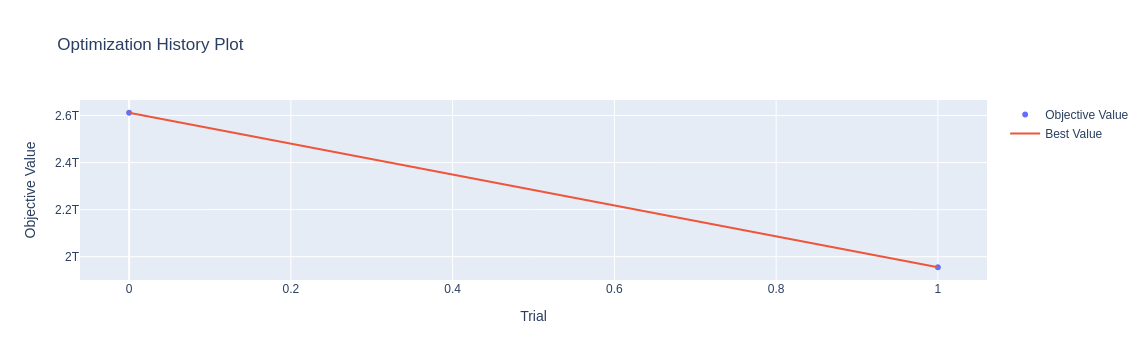

In [169]:
ov.plot_optimization_history(study)

[W 2024-05-27 17:12:15,066] You need to set up the pruning feature to utilize `plot_intermediate_values()`


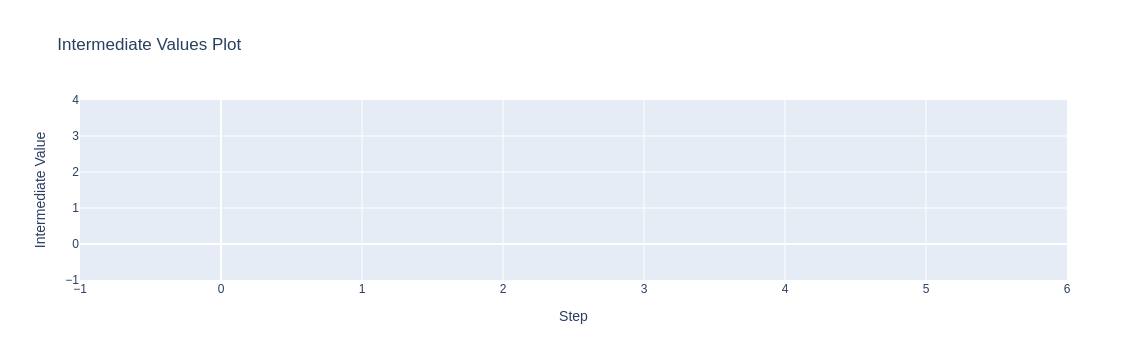

In [170]:
ov.plot_intermediate_values(study)

/tmp/ipykernel_1005274/4135506641.py:1: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



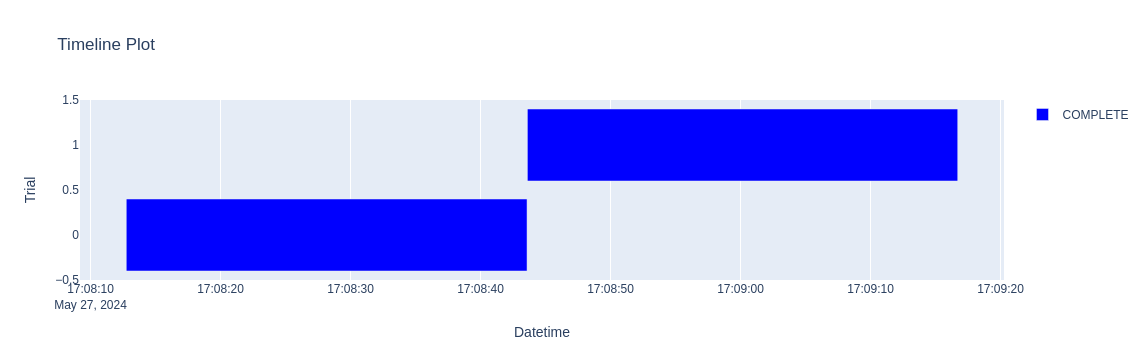

In [171]:
ov.plot_timeline(study)

2024/05/27 17:12:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7aed7bb108d74b5bbc25289c6841b9b2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/05/27 17:12:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


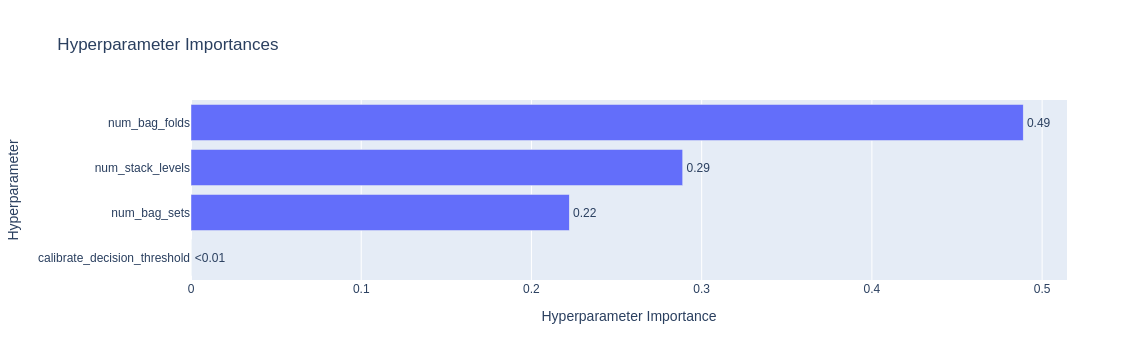

In [172]:
ov.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

# XGBoost

* https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

In [ ]:
!pip install xgboost

# bst = xgboost.train(...)
# config = bst.save_config()
# print(config)

In [173]:


def execute_xgboost(features=None, variant="default"):
    import numpy as np
    import xgboost as xgb
    from numpy import mean, std

    with mlflow.start_run(
        run_name=f"xgboost-{variant}",
        tags={"version": "v1", "library": "xgboost", "optimization": "n/a"},
        description="xgboost",
    ):
        ld = load_split(features=features)
        train_data = ld.X_train

        model = xgb.XGBRegressor(n_jobs=1, tree_method="hist", device="cuda")
        model = model.fit(ld.X_train, ld.y_train)

        calculate_metrics(ld, model, method="xgboost", variant=variant)

        return model, ld.X_train

In [174]:
_ = execute_xgboost(features=select_features(k=10)[0], variant="kbest10")
_ = execute_xgboost(features=select_features(k=20)[0], variant="kbest20")
_ = execute_xgboost()

show_results()

Series([], dtype: object)
['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']


2024/05/27 17:12:25 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  511535271068.4332
RMSE:  715216.939864006
MAE:  401716.0079209352
Series([], dtype: object)
['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']


2024/05/27 17:12:28 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  173374942521.01562
RMSE:  416383.16791269986
MAE:  229365.6992832948
Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:12:30 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  137843486125.93832
RMSE:  371272.79206257267
MAE:  215992.80115044615


,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170123
8,original,autogluon,high_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170239
9,original,autogluon,best_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170318
23,original,xgboost,default,3.712728e+05,1.378435e+11,2.159928e+05,2024-05-27T171231
22,original,xgboost,kbest20,4.163832e+05,1.733749e+11,2.293657e+05,2024-05-27T171229
6,original,linear,automlfeatures,5.622688e+05,3.161461e+11,3.757870e+05,2024-05-27T170045
5,original,linear,kbest20,5.756925e+05,3.314219e+11,3.811565e+05,2024-05-27T170034
4,original,linear,kbest15,6.221882e+05,3.871181e+11,4.102320e+05,2024-05-27T170034
21,original,xgboost,kbest10,7.152169e+05,5.115353e+11,4.017160e+05,2024-05-27T171227
2,original,linear,kbest10,8.262263e+05,6.826498e+11,5.241419e+05,2024-05-27T170033


In [175]:


def execute_xgboost_cv(features=None, variant="default"):
    import numpy as np
    import xgboost as xgb
    from numpy import mean, std
    from sklearn.model_selection import RepeatedKFold, cross_val_score

    with mlflow.start_run(
        run_name=f"xgboost-cv-{variant}",
        tags={"version": "v1", "library": "xgboost", "optimization": "cv"},
        description="xgboost cross validation",
    ):
        ld = load_split(features=features)
        train_data = ld.X_train

        model = xgb.XGBRegressor(n_jobs=1, tree_method="hist", device="cuda")
        model = model.fit(ld.X, ld.y)

        cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)
        scores = cross_val_score(model, ld.X, ld.y, cv=cv, n_jobs=-1, verbose=1)

        calculate_metrics(ld, model, method="xgboost-cv", variant=variant)
        mlflow.log_metrics({"cv-mean": mean(scores), "cv-std": std(scores)})

        return model, ld.X


# xgb_model = xgb.XGBRegressor(n_jobs=1, tree_method="hist", device="cuda")
# xgb_model.fit(X, y)
# cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)
# scores = cross_val_score(xgb_model, X, y, cv=cv, n_jobs=-1, verbose=1)
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [176]:
_ = execute_xgboost_cv(features=select_features(k=10)[0], variant="kbest10")
_ = execute_xgboost_cv(features=select_features(k=20)[0], variant="kbest20")
_ = execute_xgboost_cv()

Series([], dtype: object)
['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']


2024/05/27 17:12:47 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  1099763916020.3745
RMSE:  1048696.29350941
MAE:  635314.5038830139
Series([], dtype: object)
['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']


2024/05/27 17:12:52 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  2763699753510.8174
RMSE:  1662437.894632704
MAE:  1344822.7298401645
Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:12:56 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  2623506765520.74
RMSE:  1619724.2868836476
MAE:  1279643.6296598103


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished


In [177]:
# test_data = load_test()
# df = test_data
# test_x = df[[col for col in df.columns if col != "price"]]
# test_data = predict_and_store("xgboost", xgb_model, test_x)

In [178]:
show_results()

,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170123
8,original,autogluon,high_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170239
9,original,autogluon,best_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170318
23,original,xgboost,default,3.712728e+05,1.378435e+11,2.159928e+05,2024-05-27T171231
22,original,xgboost,kbest20,4.163832e+05,1.733749e+11,2.293657e+05,2024-05-27T171229
6,original,linear,automlfeatures,5.622688e+05,3.161461e+11,3.757870e+05,2024-05-27T170045
5,original,linear,kbest20,5.756925e+05,3.314219e+11,3.811565e+05,2024-05-27T170034
4,original,linear,kbest15,6.221882e+05,3.871181e+11,4.102320e+05,2024-05-27T170034
21,original,xgboost,kbest10,7.152169e+05,5.115353e+11,4.017160e+05,2024-05-27T171227
2,original,linear,kbest10,8.262263e+05,6.826498e+11,5.241419e+05,2024-05-27T170033


# Optuna + XGBoost

In [ ]:
print("Best parameters", xgboost_study.best_params)
print("Best value", xgboost_study.best_value)
print("Best trial", xgboost_study.best_trial)

In [190]:
xgboost_study = None
xgboost_optuna_model = None
def execute_xgboost_optuna(n_trials):
    with mlflow.start_run(
        run_name="xgboost_optuna",
        tags={"version": "v1", "library": "xgboost", "optimization": "optuna"},
        description="xgboost_optuna",
    ) as parent_run:
        mlflow.log_param("parent", "yes")
    
        def objective(trial):
            number = trial.number
            with mlflow.start_run(
                run_name=f"xgboost_optuna_trial_{number}",
                description="xgboost_optuna_trial",
                tags={
                    "version": "v1",
                    "library": "xgboost",
                    "optimization": "optuna",
                    "trial": "true",
                },
                nested=True,
            ):
                param = {
                    "max_depth": trial.suggest_int("max_depth", 1, 10),
                    "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0),
                    "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
                    "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
                    "gamma": trial.suggest_float("gamma", 0.01, 1.0),
                    "subsample": trial.suggest_float("subsample", 0.01, 1.0),
                    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.01, 1.0),
                    "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 1.0),
                    "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 1.0),
                    "random_state": trial.suggest_int("random_state", 1, 1000),
                    "device": "cuda",
                    "tree_method": "hist",
                }
                ld = load_split()
    
                model = xgb.XGBRegressor(**param)
                model = model.fit(ld.X_train, ld.y_train)
                y_pred = model.predict(ld.X_test)
    
                calculate_metrics(ld, model, method="xgboost_optuna_trial")
    
                return mean_squared_error(ld.y_test, y_pred)
    
        study = optuna.create_study(
            direction="minimize",
            storage="sqlite:///optuna.sqlite3",
            sampler=optuna.samplers.TPESampler(seed=42),
            pruner=optuna.pruners.MedianPruner(),
            study_name="xgboost-regression",
            load_if_exists=True,
        )
        study.optimize(objective, n_trials=n_trials)
    
        ld = load_split()
        model = xgboost.XGBRegressor(**study.best_params)
        model.fit(ld.X, ld.y)
        y_pred = model.predict(ld.X_test)
        xgboost_study = study
        xgboost_optuna_model = model
    
        calculate_metrics(ld, model, method="xgboost-optuna", variant=f"n{n_trials}")
        predict_and_store("xgboost-optuna", xgboost_optuna_model, ld.test_data)
        return model, study

xgboost_optuna_model, xgboost_study = execute_xgboost_optuna(n_trials=N_TRIALS)

[I 2024-05-27 17:26:53,723] Using an existing study with name 'xgboost-regression' instead of creating a new one.


Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:26:56 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  544750050201.43744
RMSE:  738071.8462327617
MAE:  544447.919384217
Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:26:58 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  303513688189.1233
RMSE:  550920.7639843712
MAE:  323170.9250428577
Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:27:01 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 684, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/xgboost/__init__.py", line 583, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking

MSE:  3380961033682.542
RMSE:  1838738.979214435
MAE:  1554698.1395594666
Series([], dtype: object)


[W 2024-05-27 17:23:55,895] You need to set up the pruning feature to utilize `plot_intermediate_values()`


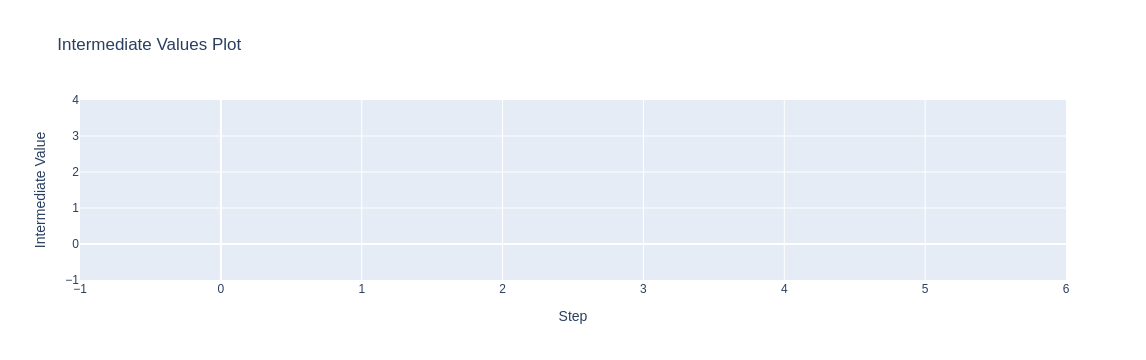

In [187]:
plot_intermediate_values(xgboost_study)

In [188]:
show_results()

,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170123
8,original,autogluon,high_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170239
9,original,autogluon,best_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170318
23,original,xgboost,default,3.712728e+05,1.378435e+11,2.159928e+05,2024-05-27T171231
22,original,xgboost,kbest20,4.163832e+05,1.733749e+11,2.293657e+05,2024-05-27T171229
27,original,xgboost_optuna_trial,,4.379024e+05,1.917585e+11,2.674252e+05,2024-05-27T171900
31,original,xgboost_optuna_trial,,5.509208e+05,3.035137e+11,3.231709e+05,2024-05-27T172351
6,original,linear,automlfeatures,5.622688e+05,3.161461e+11,3.757870e+05,2024-05-27T170045
5,original,linear,kbest20,5.756925e+05,3.314219e+11,3.811565e+05,2024-05-27T170034
4,original,linear,kbest15,6.221882e+05,3.871181e+11,4.102320e+05,2024-05-27T170034


# Optuna + LightGBM
* https://practicaldatascience.co.uk/machine-learning/how-to-tune-a-lightgbmclassifier-model-with-optuna
* https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.htmloptuna

In [197]:
dataset = load_split(datetime_to_numeric=True)

lightgbm_model = None
def execute_lightgbm(features=None, variant="default"):
    with mlflow.start_run(
        run_name="lightgbm_optuna_baseline",
        tags={"version": "v1", "library": "lightgbm", "optimization": "none"},
        description="lightgbm_optuna_baseline",
    ):
        ld = load_split(features=features)
        model = lgbm.LGBMRegressor()
        model.fit(ld.X_train, ld.y_train)
    
        y_pred = model.predict(ld.X_test)
        lightgbm_model = model
    
        calculate_metrics(ld, model, method="lightgbm", variant=variant)
        return model


Series([], dtype: object)
Series([], dtype: object)


In [198]:
_ = execute_lightgbm(features=select_features(k=10)[0], variant="kbest10")
_ = execute_lightgbm(features=select_features(k=20)[0], variant="kbest20")
_ = execute_lightgbm()

show_results()

Series([], dtype: object)
['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['decks', 'maintenance_area', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'refitted_age', 'sale_age']


2024/05/27 17:36:58 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 828, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 714, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/trac

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 10
[LightGBM] [Info] Start training from score 1614579.563662


2024/05/27 17:37:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during lightgbm autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


MSE:  446836413286.2199
RMSE:  668458.2360074711
MAE:  394479.3154442928
Series([], dtype: object)
['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']
Series([], dtype: object)
Series([], dtype: object)
Keeping features ['id', 'sale_date', 'decks', 'producer', 'created_date', 'refitted_date', 'crew_area', 'cabins_area', 'maintenance_area', 'crew_area_coef', 'weight_distribution_y', 'radar', 'bow_thruster', 'autopilot', 'solar_panels', 'navi_quality', 'overall_quality', 'created_age', 'refitted_age', 'sale_age']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in

2024/05/27 17:37:01 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 828, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 714, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/trac

MSE:  133151520955.37616
RMSE:  364899.3298916513
MAE:  221259.4456725818
Series([], dtype: object)
Series([], dtype: object)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3417
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 27
[LightGBM] [Info] Start training from score 1614579.563662


2024/05/27 17:37:03 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 828, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 714, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/trac

MSE:  115993072997.14037
RMSE:  340577.55797635927
MAE:  204044.18140886741


,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170123
8,original,autogluon,high_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170239
9,original,autogluon,best_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170318
44,original,lightgbm,default,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173151
50,original,lightgbm,default,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173705
41,original,lightgbm,baseline,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173108
47,original,lightgbm,default,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173657
43,original,lightgbm,kbest20,3.648993e+05,1.331515e+11,2.212594e+05,2024-05-27T173148
40,original,lightgbm,baseline,3.648993e+05,1.331515e+11,2.212594e+05,2024-05-27T173105
49,original,lightgbm,kbest20,3.648993e+05,1.331515e+11,2.212594e+05,2024-05-27T173702


In [213]:
lightgbm_study = None
lightgbm_optuna_model = None
def execute_lightgbm_optuna(n_trials):
    with mlflow.start_run(
        run_name="lightgbm_optuna",
        tags={"version": "v1", "library": "lightgbm", "optimization": "optuna"},
        description="lightgbm_optuna",
    ) as parent_run:
        mlflow.log_param("parent", "yes")
    
        def objective(trial):
            number = trial.number
            with mlflow.start_run(
                run_name=f"lightgbm_optuna_trial_{number}",
                description="lightgbm_optuna_trial",
                tags={
                    "version": "v1",
                    "library": "lightgbm",
                    "optimization": "optuna",
                    "trial": "true",
                },
                nested=True,
            ):
                param = {
                    "learning_rate": trial.suggest_float(
                        "learning_rate", 1e-2, 0.25, log=True
                    ),
                    "max_depth": trial.suggest_int("max_depth", 1, 9),
                    "n_estimators": trial.suggest_categorical(
                        "n_estimators", [7000, 15000, 20000]
                    ),
                    "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
                    "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
                    "num_leaves": trial.suggest_int("num_leaves", 2, 256),
                    "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
                    "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
                    "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
                    "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
                    "metric": "rmse",
                    "verbose": -1,
                }
                
                ld = load_split()
                model = lgbm.LGBMRegressor(**param)
                model = model.fit(ld.X_train, ld.y_train)
                y_pred = model.predict(ld.X_test)
    
                calculate_metrics(ld, model, method="xgboost_optuna_trial")
    
                return mean_squared_error(ld.y_test, y_pred)
    
        study = optuna.create_study(
            direction="minimize",
            storage="sqlite:///optuna.sqlite3",
            sampler=optuna.samplers.TPESampler(seed=42),
            pruner=optuna.pruners.MedianPruner(),
            study_name="lightgbm-regression",
            load_if_exists=True,
        )
        study.optimize(objective, n_trials=n_trials)
    
        ld = load_split()
        model = lgbm.LGBMRegressor(**study.best_params)
        model.fit(ld.X, ld.y)
        y_pred = model.predict(ld.X_test)
        lightgbm_study = study
        lightgbm_optuna_model = model

        calculate_metrics(ld, model, method="lightgbm-optuna", variant=f"n{n_trials}")
        predict_and_store("lightgbm-optuna", lightgbm_optuna_model, ld.test_data)
        return model, study
    


In [214]:
lightgbm_optuna_model, lightgbm_study = execute_lightgbm_optuna(n_trials=N_TRIALS)

[I 2024-05-27 17:44:31,046] Using an existing study with name 'lightgbm-regression' instead of creating a new one.


Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:44:36 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 828, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 714, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/trac

MSE:  147473231244.01862
RMSE:  384022.4358602224
MAE:  218624.08627782858
Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:44:45 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 828, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 714, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/trac

MSE:  134222578745.4979
RMSE:  366363.99761097966
MAE:  225187.20648355363
Series([], dtype: object)
Series([], dtype: object)


2024/05/27 17:44:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


[LightGBM] [Warning] feature_fraction is set=0.7671117368334277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7671117368334277
[LightGBM] [Warning] lambda_l2 is set=7.71800699380605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.71800699380605e-05
[LightGBM] [Warning] lambda_l1 is set=0.00052821153945323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00052821153945323
[LightGBM] [Warning] bagging_fraction is set=0.4836963163912251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4836963163912251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7671117368334277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7671117368334277
[LightGBM] [Warning] lambda_l2 is set=7.71800699380605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.71800699380605e-05
[LightGBM] [Warning] lambd

2024/05/27 17:44:56 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 828, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/lightgbm/__init__.py", line 714, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/tracking/fluent.py", line 1068, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/gmatheu/.pyenv/versions/3.11.4/envs/intive-interstellar-sales-showdown/lib/python3.11/site-packages/mlflow/trac

[LightGBM] [Warning] feature_fraction is set=0.7671117368334277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7671117368334277
[LightGBM] [Warning] lambda_l2 is set=7.71800699380605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.71800699380605e-05
[LightGBM] [Warning] lambda_l1 is set=0.00052821153945323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00052821153945323
[LightGBM] [Warning] bagging_fraction is set=0.4836963163912251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4836963163912251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


2024/05/27 17:44:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during lightgbm autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


[LightGBM] [Warning] feature_fraction is set=0.7671117368334277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7671117368334277
[LightGBM] [Warning] lambda_l2 is set=7.71800699380605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.71800699380605e-05
[LightGBM] [Warning] lambda_l1 is set=0.00052821153945323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00052821153945323
[LightGBM] [Warning] bagging_fraction is set=0.4836963163912251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4836963163912251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7671117368334277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7671117368334277
[LightGBM] [Warning] lambda_l2 is set=7.71800699380605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.71800699380605e-05
[LightGBM] [Warning] lambd

In [215]:
show_results()

,dataset,method,variant,rmse,mse,mae,timestamp
7,original,autogluon,medium_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170123
8,original,autogluon,high_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170239
9,original,autogluon,best_quality,1.421203e+05,2.019818e+10,8.162711e+04,2024-05-27T170318
44,original,lightgbm,default,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173151
50,original,lightgbm,default,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173705
41,original,lightgbm,baseline,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173108
47,original,lightgbm,default,3.405776e+05,1.159931e+11,2.040442e+05,2024-05-27T173657
43,original,lightgbm,kbest20,3.648993e+05,1.331515e+11,2.212594e+05,2024-05-27T173148
40,original,lightgbm,baseline,3.648993e+05,1.331515e+11,2.212594e+05,2024-05-27T173105
49,original,lightgbm,kbest20,3.648993e+05,1.331515e+11,2.212594e+05,2024-05-27T173702


# cuML

* https://docs.rapids.ai/api/cuml/stable/cuml_intro/#where-possible-match-the-scikit-learn-api

# AutoXGB

* https://github.com/abhishekkrthakur/autoxgb

In [ ]:
# !pip install autoxgb

In [ ]:

# from autoxgb import AutoXGB


# # required parameters:
# train_filename = "train.csv"
# output = "autoxgb-output"

# # optional parameters
# test_filename = "test.csv"
# task = None
# idx = None
# targets = ["price"]
# features = None
# categorical_features = None
# use_gpu = False
# num_folds = 5
# seed = 42
# num_trials = 100
# time_limit = 360
# fast = True

# # Now its time to train the model!
# axgb = AutoXGB(
#     train_filename=train_filename,
#     output=output,
#     test_filename=test_filename,
#     task=task,
#     idx=idx,
#     targets=targets,
#     features=features,
#     categorical_features=categorical_features,
#     use_gpu=use_gpu,
#     num_folds=num_folds,
#     seed=seed,
#     num_trials=num_trials,
#     time_limit=time_limit,
#     fast=fast,
# )

In [ ]:
# axgb.train()

# Sample

In [ ]:
sample_submission

In [ ]:
! pip install -U pip

# Notebooks with GPU
* https://www.kaggle.com/ (30 hours)
* https://colab.research.google.com/ (free-tier w GPU)
* https://www.paperspace.com/pricing (free-tier no GPU)
* https://saturncloud.io/plans/saturn_cloud_plans/ (free-tier w GPU?, Waitlist)
* https://deepnote.com/ (free-tier no GPU)
* https://studiolab.sagemaker.aws/login (waitlist, free-tier with GPU)


## MLFlow Proxy

In [ ]:


# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2VwE0ghPzEaPvlzIt9tdltGLFRZ_6nyxEMvYDUGjwfsW8A3xh"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5555", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

In [11]:
# run = wandb.init(project=WANDB_PROJECT)


# ds_art = wandb.Artifact(name="original", type="dataset", description="Original dataset")

# # Attach our processed data to the Artifact
# ds_art.add_file(train_path)
# ds_art.add_file(test_path)

# table = wandb.Table(dataframe=load_train().sample(1000))
# wandb.log({"dataset": table})


# run.log_artifact(ds_art)

# run.finish()